# Data preparation

In [42]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import subprocess

%matplotlib inline

In [43]:
mpl.rcParams['figure.figsize'] = (16,9)
pd.set_option('display.max_rows', 500)

# We get data from John hopkins github account as a .csv file using gitpull

In [44]:
git_pull = subprocess.Popen( "git pull" , 
                     cwd = os.path.dirname( '../data/raw/COVID-19/' ), 
                     shell = True, 
                     stdout = subprocess.PIPE, 
                     stderr = subprocess.PIPE )
(out, error) = git_pull.communicate()


print("Error : " + str(error)) 
print("out : " + str(out))

Error : b''
out : b'Already up to date.\n'


In [45]:
datapath='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw= pd.read_csv (datapath)

In [46]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1199,1199,1215,1215,1215,1261,1261,1301,1301,1344
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2777,2805,2876,2935,2965,2981,3033,3092,3217,3279


In [47]:
time_idx=pd_raw.columns[4:]

In [48]:
df_plot= pd.DataFrame({
    'date':time_idx})
df_plot.tail()

,date
229,9/7/20
230,9/8/20
231,9/9/20
232,9/10/20
233,9/11/20


In [49]:
country_list=[ 'US', 'Spain','Germany', 'Korea, South','Italy']

In [50]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))


In [51]:
df_plot.tail()

,date,US,Spain,Germany,"Korea, South",Italy
229,9/7/20,6300622,525549,253626,21432,278784
230,9/8/20,6327009,534513,254957,21588,280153
231,9/9/20,6360212,543379,256433,21743,281583
232,9/10/20,6396100,554143,258149,21919,283180
233,9/11/20,6443743,566326,259735,22055,284796


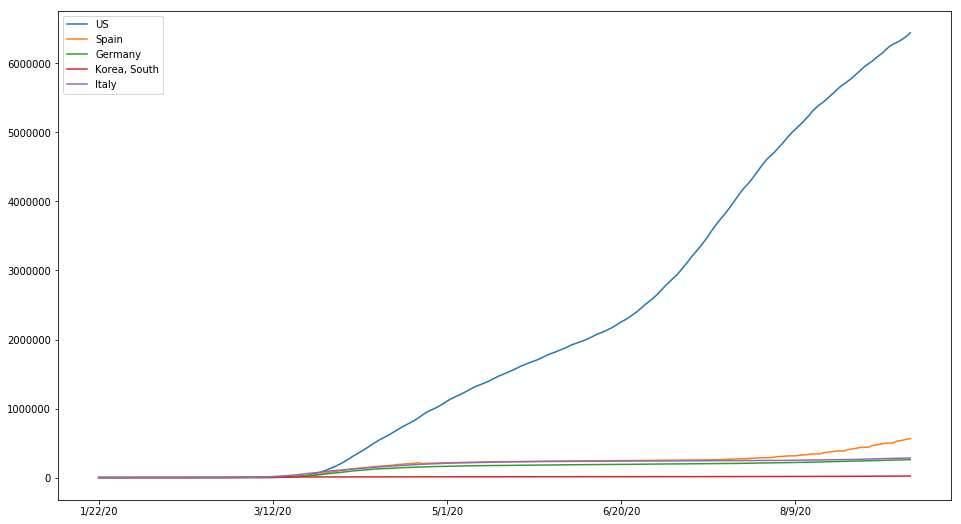

In [52]:
df_plot.set_index(time_idx).plot()

# Date  datatype object

<Figure size 1152x648 with 0 Axes>

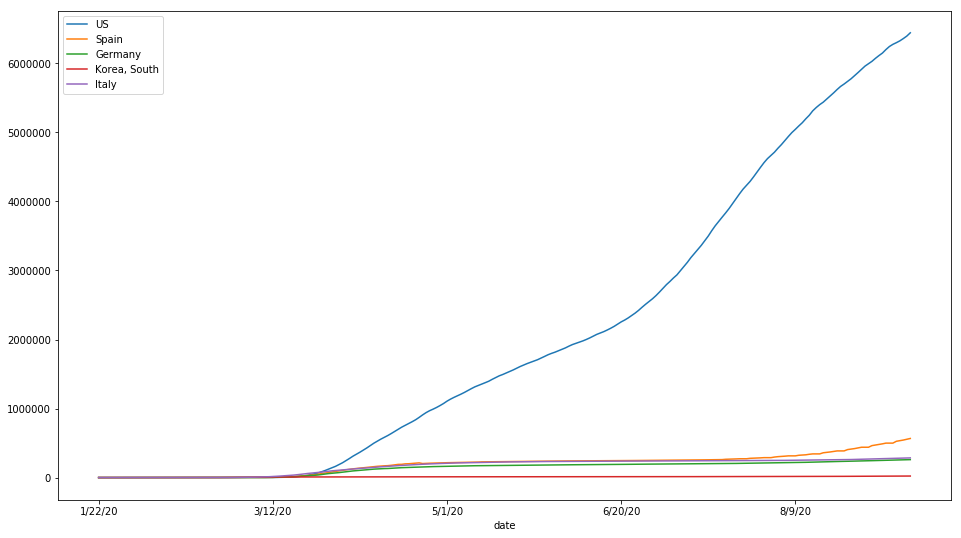

In [53]:
plt.figure();
ax = df_plot.set_index("date").plot()
ax.set_yscale('linear')

In [54]:
type(df_plot.date[0])

str

In [55]:
df_plot.head()

,date,US,Spain,Germany,"Korea, South",Italy
0,1/22/20,1,0,0,1,0
1,1/23/20,1,0,0,1,0
2,1/24/20,2,0,0,2,0
3,1/25/20,2,0,0,2,0
4,1/26/20,5,0,0,3,0


In [56]:
from datetime import datetime

In [57]:
df_plot.date[0]

'1/22/20'

In [58]:
datetime.strptime(df_plot.date[0],"%m/%d/%y")

datetime.datetime(2020, 1, 22, 0, 0)

In [59]:
time_idx=[datetime.strptime(each,"%m/%d/%y") for each in df_plot.date]

In [60]:
time_idx

[datetime.datetime(2020, 1, 22, 0, 0),
 datetime.datetime(2020, 1, 23, 0, 0),
 datetime.datetime(2020, 1, 24, 0, 0),
 datetime.datetime(2020, 1, 25, 0, 0),
 datetime.datetime(2020, 1, 26, 0, 0),
 datetime.datetime(2020, 1, 27, 0, 0),
 datetime.datetime(2020, 1, 28, 0, 0),
 datetime.datetime(2020, 1, 29, 0, 0),
 datetime.datetime(2020, 1, 30, 0, 0),
 datetime.datetime(2020, 1, 31, 0, 0),
 datetime.datetime(2020, 2, 1, 0, 0),
 datetime.datetime(2020, 2, 2, 0, 0),
 datetime.datetime(2020, 2, 3, 0, 0),
 datetime.datetime(2020, 2, 4, 0, 0),
 datetime.datetime(2020, 2, 5, 0, 0),
 datetime.datetime(2020, 2, 6, 0, 0),
 datetime.datetime(2020, 2, 7, 0, 0),
 datetime.datetime(2020, 2, 8, 0, 0),
 datetime.datetime(2020, 2, 9, 0, 0),
 datetime.datetime(2020, 2, 10, 0, 0),
 datetime.datetime(2020, 2, 11, 0, 0),
 datetime.datetime(2020, 2, 12, 0, 0),
 datetime.datetime(2020, 2, 13, 0, 0),
 datetime.datetime(2020, 2, 14, 0, 0),
 datetime.datetime(2020, 2, 15, 0, 0),
 datetime.datetime(2020, 2, 16, 0,

In [61]:
time_str=[each.strftime('%Y-%m-%d') for each in time_idx]

In [62]:
time_str[0:5]

['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26']

In [63]:
df_plot['date']=time_idx

In [64]:
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [65]:
df_plot.tail()

,date,US,Spain,Germany,"Korea, South",Italy
229,2020-09-07,6300622,525549,253626,21432,278784
230,2020-09-08,6327009,534513,254957,21588,280153
231,2020-09-09,6360212,543379,256433,21743,281583
232,2020-09-10,6396100,554143,258149,21919,283180
233,2020-09-11,6443743,566326,259735,22055,284796


In [66]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv', sep=';')

# Relational data model- defining a primary key

In [67]:
datapath='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw= pd.read_csv(datapath)

In [68]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1199,1199,1215,1215,1215,1261,1261,1301,1301,1344
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2777,2805,2876,2935,2965,2981,3033,3092,3217,3279


In [69]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country','Province/State':'state'})


In [70]:
pd_data_base=pd_data_base.drop(['Lat', 'Long'], axis=1)
pd_data_base.head()


,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606
1,NaN,Albania,0,0,0,0,0,0,0,0,...,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,1199,1199,1215,1215,1215,1261,1261,1301,1301,1344
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2777,2805,2876,2935,2965,2981,3033,3092,3217,3279


In [71]:
test_pd=pd_data_base.set_index(['state','country']).T
test_pd

state           NaN                                                     \
country Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda   
1/22/20           0       0       0       0      0                   0   
1/23/20           0       0       0       0      0                   0   
1/24/20           0       0       0       0      0                   0   
1/25/20           0       0       0       0      0                   0   
1/26/20           0       0       0       0      0                   0   
1/27/20           0       0       0       0      0                   0   
1/28/20           0       0       0       0      0                   0   
1/29/20           0       0       0       0      0                   0   
1/30/20           0       0       0       0      0                   0   
1/31/20           0       0       0       0      0                   0   
2/1/20            0       0       0       0      0                   0   
2/2/20            0       0       0       0      0                   0   
2/3/20            0       0       0       0      0                   0   
2/4/20            0       0       0       0      0                   0   
2/5/20            0       0       0       0      0                   0   
2/6/20            0       0       0       0      0                   0   
2/7/20            0       0       0       0      0                   0   
2/8/20            0       0       0       0      0                   0   
2/9/20            0       0       0       0      0                   0   
2/10/20           0       0       0       0      0                   0   
2/11/20           0       0       0       0      0                   0   
2/12/20           0       0       0       0      0                   0   
2/13/20           0       0       0       0      0                   0   
2/14/20           0       0       0       0      0                   0   
2/15/20           0       0       0       0      0                   0   
2/16/20           0       0       0       0      0                   0   
2/17/20           0       0       0       0      0                   0   
2/18/20           0       0       0       0      0                   0   
2/19/20           0       0       0       0      0                   0   
2/20/20           0       0       0       0      0                   0   
2/21/20           0       0       0       0      0                   0   
2/22/20           0       0       0       0      0                   0   
2/23/20           0       0       0       0      0                   0   
2/24/20           1       0       0       0      0                   0   
2/25/20           1       0       1       0      0                   0   
2/26/20           1       0       1       0      0                   0   
2/27/20           1       0       1       0      0                   0   
2/28/20           1       0       1       0      0                   0   
2/29/20           1       0       1       0      0                   0   
3/1/20            1       0       1       0      0                   0   
3/2/20            1       0       3       1      0                   0   
3/3/20            1       0       5       1      0                   0   
3/4/20            1       0      12       1      0                   0   
3/5/20            1       0      12       1      0                   0   
3/6/20            1       0      17       1      0                   0   
3/7/20            1       0      17       1      0                   0   
3/8/20            4       0      19       1      0                   0   
3/9/20            4       2      20       1      0                   0   
3/10/20           5      10      20       1      0                   0   
3/11/20           7      12      20       1      0                   0   
3/12/20           7      23      24       1      0                   0   
3/13/20           7      33      26       1      0                   1   
3/14

In [72]:
test_pd.columns

MultiIndex([(                           nan,         'Afghanistan'),
            (                           nan,             'Albania'),
            (                           nan,             'Algeria'),
            (                           nan,             'Andorra'),
            (                           nan,              'Angola'),
            (                           nan, 'Antigua and Barbuda'),
            (                           nan,           'Argentina'),
            (                           nan,             'Armenia'),
            ('Australian Capital Territory',           'Australia'),
            (             'New South Wales',           'Australia'),
            ...
            (                           nan,      'United Kingdom'),
            (                           nan,             'Uruguay'),
            (                           nan,          'Uzbekistan'),
            (                           nan,           'Venezuela'),
            (     

In [73]:
test_pd.stack(level=[0,1])

         state     country           
1/22/20  NaN       Afghanistan               0.0
                   Albania                   0.0
                   Algeria                   0.0
                   Andorra                   0.0
                   Angola                    0.0
                                          ...   
9/11/20  Zhejiang  West Bank and Gaza    29256.0
                   Western Sahara           10.0
                   Yemen                  2007.0
                   Zambia                13323.0
                   Zimbabwe               7479.0
Length: 105768, dtype: float64

In [74]:
pd_relational_model=test_pd.stack(level=[0,1])\
                           .reset_index()\
                           .rename(columns={'level_0':'date', 0:'confirmed'}
                                           )
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [75]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [76]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [77]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [78]:
pd_relational_model.tail()

,date,state,country,confirmed
105763,2020-09-11,Zhejiang,West Bank and Gaza,29256.0
105764,2020-09-11,Zhejiang,Western Sahara,10.0
105765,2020-09-11,Zhejiang,Yemen,2007.0
105766,2020-09-11,Zhejiang,Zambia,13323.0
105767,2020-09-11,Zhejiang,Zimbabwe,7479.0


In [79]:
pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv', sep=';')